**Install the Dependencies we will need for the project**

In [2]:
!pip install tensorflow stable-baselines3 gym-anytrading gym

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [4]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
# Update: import from stable_baselines3 instead of stable_baselines
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Bring in MarketWatch GME Data**

In [5]:
df = pd.read_csv('/content/gmedata.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df

,Date,Open,High,Low,Close,Volume
0,12/31/2024,32.06,32.44,31.10,31.34,"7,395,297"
1,12/30/2024,31.80,32.88,31.61,32.01,"9,593,140"
2,12/27/2024,32.39,33.05,30.73,32.20,"10,141,660"
3,12/26/2024,32.62,34.37,31.60,32.99,"20,510,650"
4,12/24/2024,31.00,31.59,30.58,31.14,"5,523,507"
...,...,...,...,...,...,...
247,01/08/2024,15.78,16.12,15.70,15.79,"3,031,109"
248,01/05/2024,16.16,16.52,15.96,15.96,"2,619,192"
249,01/04/2024,16.51,16.75,16.31,16.36,"2,671,512"
250,01/03/2024,16.30,16.83,15.90,16.69,"4,193,550"


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,object


In [8]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-31,32.06,32.44,31.10,31.34,"7,395,297"
2024-12-30,31.80,32.88,31.61,32.01,"9,593,140"
2024-12-27,32.39,33.05,30.73,32.20,"10,141,660"
2024-12-26,32.62,34.37,31.60,32.99,"20,510,650"
2024-12-24,31.00,31.59,30.58,31.14,"5,523,507"


In [15]:
env = StocksEnv(df=df, frame_bound=(5,100), window_size=5)


In [16]:
env.signal_features

array([[31.34,  0.  ],
       [32.01,  0.67],
       [32.2 ,  0.19],
       [32.99,  0.79],
       [31.14, -1.85],
       [30.9 , -0.24],
       [29.82, -1.08],
       [29.  , -0.82],
       [28.55, -0.45],
       [31.26,  2.71],
       [29.44, -1.82],
       [27.99, -1.45],
       [28.75,  0.76],
       [28.97,  0.22],
       [26.93, -2.04],
       [27.93,  1.  ],
       [29.06,  1.13],
       [28.63, -0.43],
       [27.03, -1.6 ],
       [27.44,  0.41],
       [27.27, -0.17],
       [29.05,  1.78],
       [30.89,  1.84],
       [30.33, -0.56],
       [29.67, -0.66],
       [27.9 , -1.77],
       [27.82, -0.08],
       [28.45,  0.63],
       [27.57, -0.88],
       [26.44, -1.13],
       [26.59,  0.15],
       [27.37,  0.78],
       [26.46, -0.91],
       [26.84,  0.38],
       [27.26,  0.42],
       [24.88, -2.38],
       [23.45, -1.43],
       [23.1 , -0.35],
       [22.99, -0.11],
       [22.33, -0.66],
       [22.41,  0.08],
       [22.18, -0.23],
       [23.28,  1.1 ],
       [22.

In [17]:
env.action_space


Discrete(2)

info: {'total_reward': -6.94999885559082, 'total_profit': 0.5655336736036388, 'position': <Positions.Short: 0>}


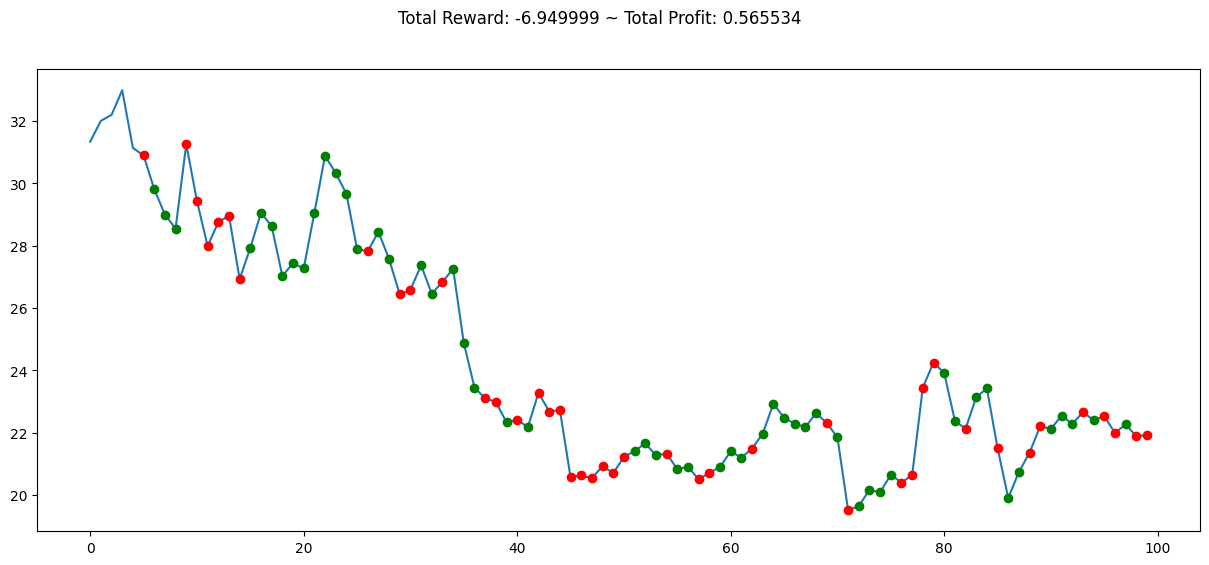

In [19]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, truncated, info = env.step(action)  # Expect 5 values

    if done or truncated:  # Stop if either `done` or `truncated` is True
        print("info:", info)
        break

import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()


In [21]:
env_maker = lambda: StocksEnv(df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [23]:
from stable_baselines3 import A2C

model = A2C('MlpPolicy', env, verbose=1)  # Use 'MlpPolicy' instead of 'MlpLstmPolicy'
model.learn(total_timesteps=1000000)


Streaming output truncated to the last 5000 lines.
|    value_loss         | 6.28e-08 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 589      |
|    iterations         | 164400   |
|    time_elapsed       | 1393     |
|    total_timesteps    | 822000   |
| train/                |          |
|    entropy_loss       | -5.1e-05 |
|    explained_variance | 0.00279  |
|    learning_rate      | 0.0007   |
|    n_updates          | 164399   |
|    policy_loss        | 2.04e-09 |
|    value_loss         | 3.46e-07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 589      |
|    iterations         | 164500   |
|    time_elapsed       | 1394     |
|    total_timesteps    | 822500   |
| train/                |          |
|    entropy_loss       | -5.1e-05 |
|    explained_variance | 0.00304  |
|    learning_rate      

In [25]:
import numpy as np

obs, _ = env.reset()  # Unpack the second returned value (info)
while True:
    obs = obs[np.newaxis, ...]  # Add batch dimension for SB3
    action, _states = model.predict(obs)
    obs, rewards, done, truncated, info = env.step(action)  # Expect 5 values

    if done or truncated:  # Stop if done or truncated
        print("info:", info)
        break


info: {'total_reward': 0.0, 'total_profit': 0.7244180758446765, 'position': <Positions.Long: 1>}


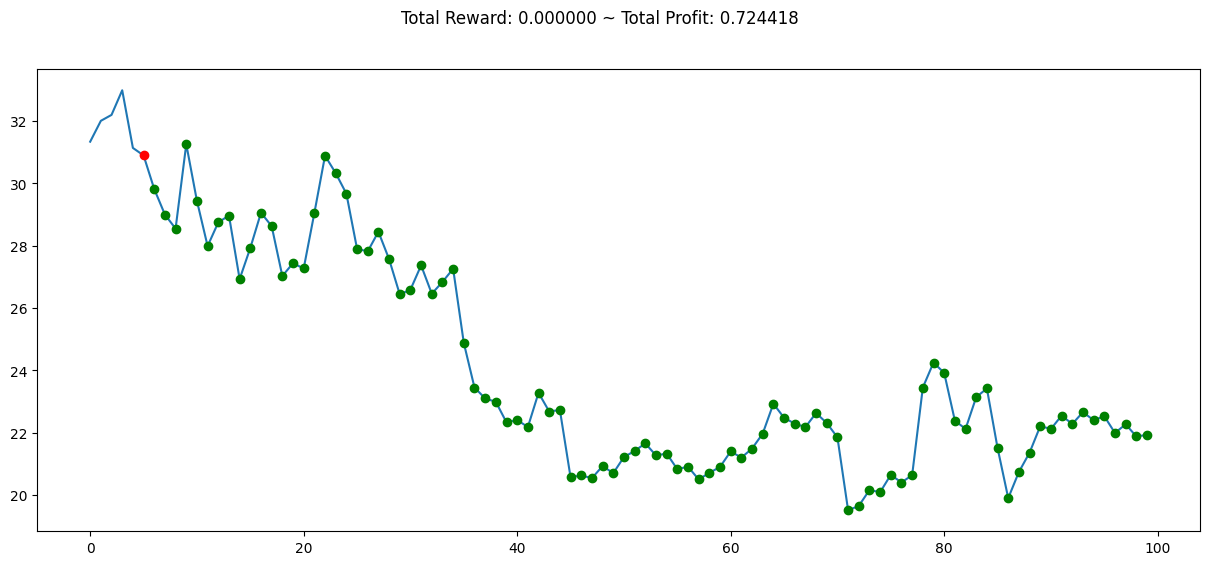

In [26]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()